<a href="https://colab.research.google.com/github/ZacharySBrown/vcu-scma440-2021q1/blob/master/assignments/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Fetch Data
Press the play button in Google Colab or press Shift+Enter execute the cell below to download and load the data and packages for this assignment

This will setup you environment and load a DataFrame called `energen_rev` that contains monthly revenue data for the Australian Company Energen from 1961 - 1992. 

In [1]:
! pip install --upgrade statsmodels

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels as sm
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import matplotlib.pyplot as plt  
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import t, f

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16
!curl https://vcu-scma-440.s3.amazonaws.com/data/energen_rev2.csv > energen_rev2.csv
    
energen_rev = pd.read_csv('energen_rev2.csv', parse_dates=['date']).set_index('date')

     |████████████████████████████████| 9.5MB 4.5MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19864  100 19864    0     0  95043      0 --:--:-- --:--:-- --:--:-- 94590


# 1: Identifying ARIMA model in `revenue`
In this example, we'll attempt to identify an ARIMA model in the `revenue` time series. 
 
Begin by plotting the time series `energen_rev['revenue']`, as well as the PACF and ACF to check for non-stationarity. 

If the data is non-stationary, apply one-step differencing using the following expression: 

```
energen_rev['revenue_diff'] = energen_rev['revenue'].diff().dropna()
```

Lastly, use the ACF and PACF plots to identify an appropriate $ARIMA(p,d,q)(P,D,Q)_{s}$ that could be applied to the time series.

The [`arima_exploration`](https://github.com/ZacharySBrown/vcu-scma440-2021q1/blob/master/examples/7a_arima_exploration.ipynb) example from class will be an excellent reference for this problem. 

## 1a. Initial Plots
In the cell below, plot `energen_rev['revenue']` as well as the ACF and PACF

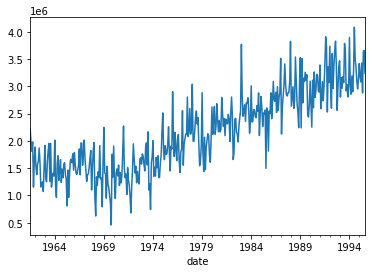

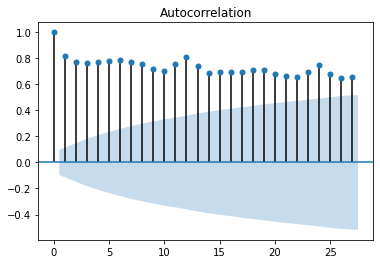

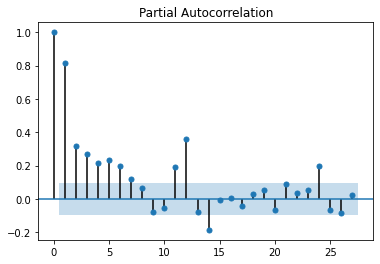

In [2]:
## YOUR CODE HERE

display(energen_rev['revenue'].plot())
my_acf = plot_acf(energen_rev['revenue'])
my_pacf = plot_pacf(energen_rev['revenue'])

## 1b. Removing non-stationarity
If the plots above indicate non-stationarity, copy and paste the following in the cell below to do one-step differencing on the time series to remove the non-stationarity (and also remove any `NaN` values in the resulting `DataFrame`. 

```
energen_rev['revenue_diff'] = energen_rev['revenue'].diff()
energen_rev = energen_rev.dropna()
```

In [3]:
# YOUR CODE HERE

energen_rev['revenue_diff'] = energen_rev['revenue'].diff()
energen_rev = energen_rev.dropna()

## 1c. Identifying the appropriate ARIMA Model

If you differenced the data above, plot the ACF and PACF of the differenced data (`revenue_diff`) in the cell below, otherwise re-plot the ACF and PACF of the original revenue data (`revenue`). On your final exam sheet, write the identified model in the notation:

$$ ARIMA\left(p,d,q\right)\left(P,D,Q\right)_{s} $$

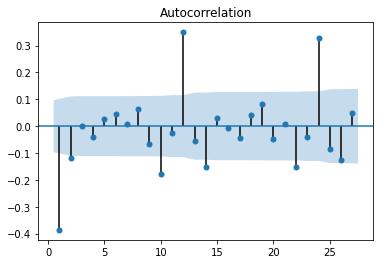

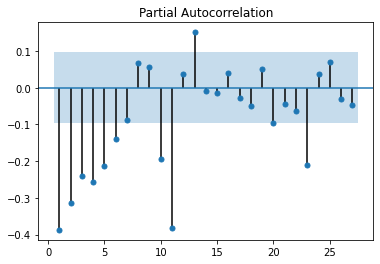

In [4]:
# YOUR CODE HERE
my_acf = plot_acf(energen_rev['revenue_diff'], zero=False)
my_pacf = plot_pacf(energen_rev['revenue_diff'], zero=False)

# 2. Fitting an ARIMA Model

Using the `ARIMA` function, fit the ARIMA model identified in problem 1c to the `energen_rev['revenue']` data (i.e. set `endog=energen_rev['revenue']`). Be sure to specify the correct ARIMA model identified above using the `order` and `seasonal_order` parameters to `ARIMA`. Make sure also to specify one-step (and possibly seasonal) differencing if you found you needed to difference the data in problem 1b to make the data stationary!

Once you've specified the model, fit the model, and print `results.summary()`. On your final exam sheet, write in the value of `AIC` printed in the results summary. 

In [5]:
# YOUR CODE HERE

model = ARIMA(
    endog=energen_rev['revenue'],
    order=(0,1,1), 
    seasonal_order=(0,1,1,12)
 )

results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                    SARIMAX Results                                     
Dep. Variable:                          revenue   No. Observations:                  409
Model:             ARIMA(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -5601.542
Date:                          Mon, 03 May 2021   AIC                          11209.084
Time:                                  22:15:09   BIC                          11221.028
Sample:                              08-01-1961   HQIC                         11213.816
                                   - 08-01-1995                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6855      0.047    -14.504      0.000      -0.778      -0.593
ma.S.L12      -0.8367      0.058    -14.495      0.

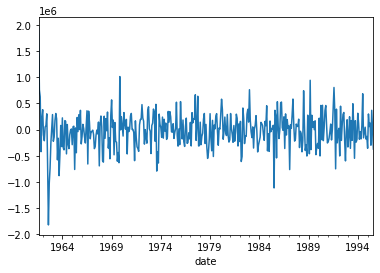

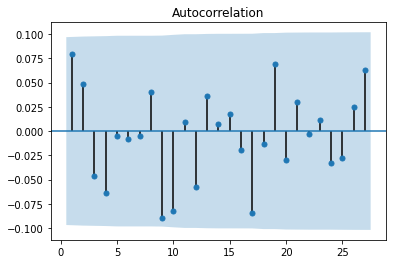

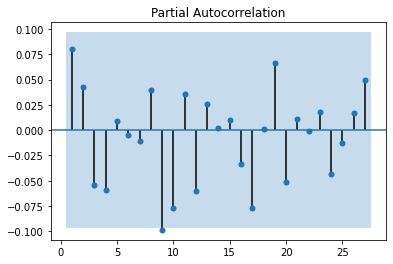

In [6]:
results.resid.plot()
my_acf = plot_acf(results.resid, zero=False)
my_pacf = plot_pacf(results.resid, zero=False)

# 3. Fitting an Regression with ARIMA Errors

In this section, we'll use the other variables (`cars`, `gas`, and `elec`) in the `energen_rev` `DataFrame` to carry out a multiple linear regression with ARIMA errors, using the same ARIMA model identified in problem 1c. To do this we only need to add one argument to our code from problem 2, namely `exog=energen_rev[['gas','elec','cars']]`. In the cell below, create and fit an ARIMA model, this time specifying the `exog` parameters as well. 

Once you've specified the model, fit the model, and print `results.summary()`. On your final exam sheet, write in the value of `AIC` printed in the results summary for problem 3, and state whether or not this new fit is better or worse that the ARIMA model from problem 2. 

In [8]:
# YOUR CODE HERE

model = ARIMA(
    endog=energen_rev['revenue'],
    exog=energen_rev[['gas','elec','cars']],
    order=(0,1,1), 
    seasonal_order=(0,1,1,12)
 )

results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                    SARIMAX Results                                     
Dep. Variable:                          revenue   No. Observations:                  409
Model:             ARIMA(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -5567.943
Date:                          Mon, 03 May 2021   AIC                          11147.885
Time:                                  22:15:29   BIC                          11171.774
Sample:                              08-01-1961   HQIC                         11157.349
                                   - 08-01-1995                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gas            8.7121     13.137      0.663      0.507     -17.036      34.460
elec         234.4936    125.744      1.865      0.